# KMeans Clustering for Customer Data

## Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

## KMeans Clustering

K-Means is a centroid-based algorithm that partitions the data into K distinct clusters. Each point belongs to the cluster with the nearest mean.It is one of the simplest and popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

K-Means works well for large datasets and forms spherical clusters. However, it's sensitive to outliers and initial centroid positions.

### Imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

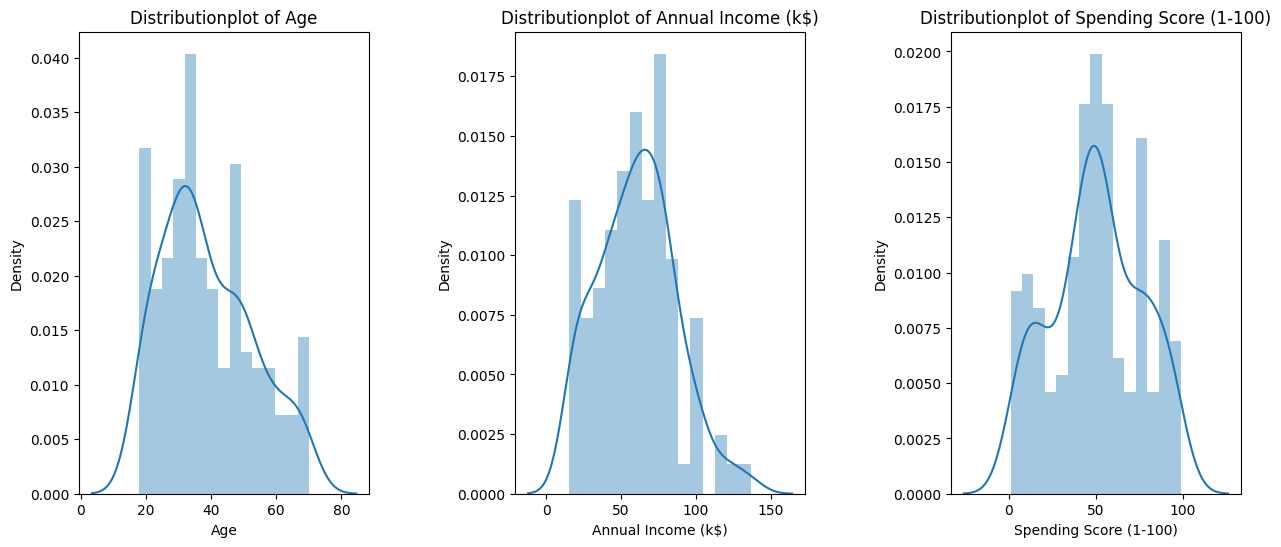

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distributionplot of {}'.format(x))
plt.show()


**Distribution-Plot of Age:** This plot shows the distribution of the ages of the mall customers. The histogram portion (the bars) represents the count of customers within each age bin, while the blue line (KDE) estimates the probability density function of the age variable. From the plot, it seems there are peaks at certain age ranges, indicating concentrations of customers in those age groups.

**Distribution-Plot of Annual Income (k$):** This plot illustrates the distribution of the customers' annual income. The histogram shows the frequency of customers within various income ranges, and the KDE line provides a smooth estimate of the income distribution. The distribution appears to be somewhat uniform with a peak around the 50-60k range, indicating a higher concentration of customers with that income level.

**Distribution-Plot of Spending Score (1-100):** The third plot represents the distribution of the spending scores assigned to customers, with the histogram detailing the frequency of scores and the KDE offering a continuous probability density curve. This distribution has a more complex shape, with multiple peaks indicating various groups of customers having distinct spending behaviors.

##### Disgression: KDE

KDE stands for **Kernel Density Estimate**, and it's a way to estimate the probability distribution of a continuous variable. 

Imagine you have a bunch of points along a line, which represent data like ages or incomes. If you were to draw little vertical lines (like a bar chart) at each point, you'd see where the points pile up and where they're sparse.

Now, instead of just drawing a straight line at each point, imagine you place a small, smooth hill over each point. These hills are the "kernels". They're all the same shape, but their center is at the actual data point. The height of the hill at the center represents the contribution of that point to the probability of finding a value at that location.

When you add up all these little hills, you get a smooth curve that flows up and down along the line. This curve shows you where the data is concentrated (the hills overlap a lot, making the curve higher) and where it's not (the hills don't overlap much, so the curve is lower). This smooth curve is the KDE.

The main idea is that the KDE gives you a smooth version of the bar chart that can tell you how your data points are distributed along a range, which can be much easier to read and understand than just a bunch of individual points or bars.

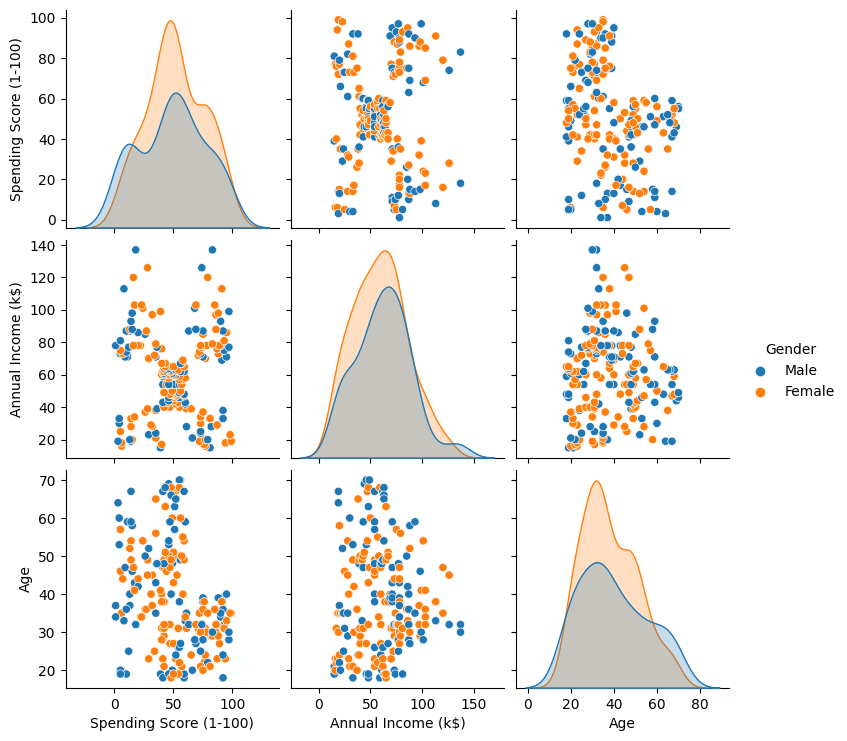

In [9]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

##### Interpretation: 

**Diagonal:** The diagonal plots are not comparisons between two different variables, but rather show the distribution of a single variable for different genders. The blue line represents the KDE for males, and the orange line represents the KDE for females. These plots show how each variable is distributed across the two genders.

**Off-diagonal:** The off-diagonal plots show the relationship between two different variables, with one variable on the x-axis and the other on the y-axis. Points represent individual customers, with male customers shown in blue and female customers shown in orange.

**Interpreting the plots:**

**Spending Score vs. Annual Income:** <br>
This relationship is shown twice, where the plot on the top row, second from the left, has Spending Score on the x-axis and Annual Income on the y-axis. The plot on the bottom row, second from the right, shows the inverse. These plots can give you an idea of whether there's a pattern between how much a customer earns and how much they spend.

**Spending Score vs. Age:** <br>
Similarly, these plots show if there's a connection between the age of a customer and their spending habits.

**Annual Income vs. Age:** <br>
These plots show the relationship between a customer's age and their income.


The scatter plots can reveal correlations or patterns, such as clusters where a group of points may form a shape indicating a relationship, like an upward trend or a cloud of points. For instance, if there's a cluster of points towards the high end of both axes in the Annual Income vs. Spending Score plots, it might suggest that customers with higher incomes also tend to have higher spending scores.

###  2D Clustering Age vs Spending Score

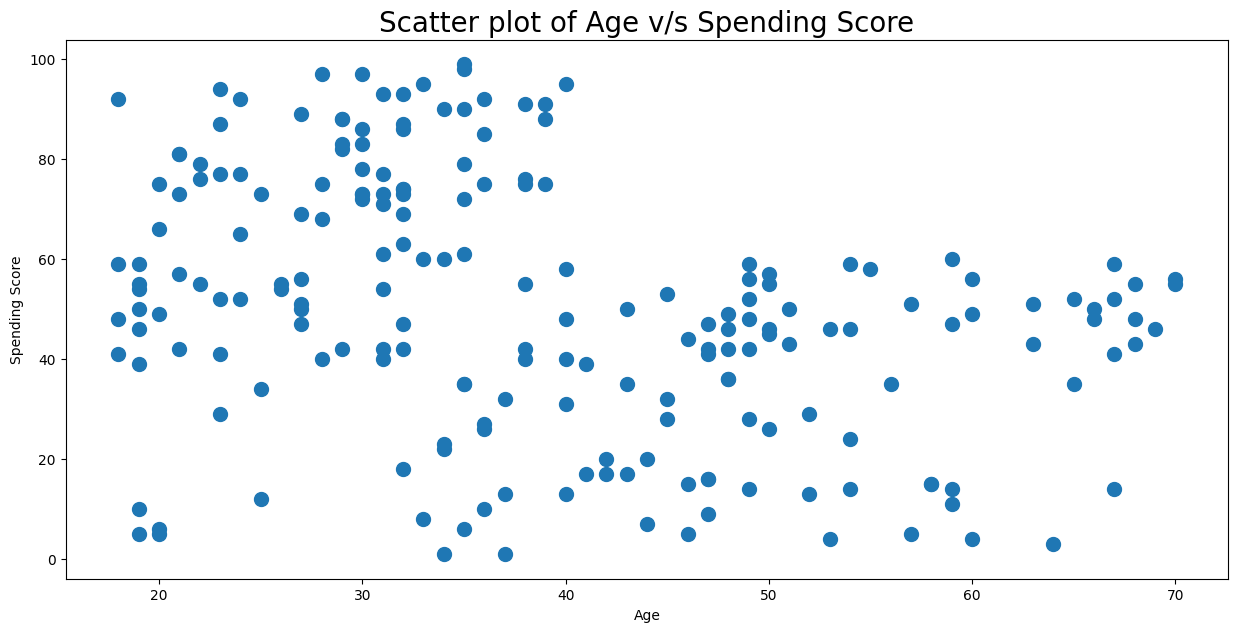

In [10]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

#### Using Ellbow Method to define optimal K Value

The **elbow method** is a heuristic used for finding the optimal number of clusters (*k*) in a dataset for k-means clustering or a similar clustering algorithm. The idea behind the elbow method is to plot the cost (or inertia) of the clustering as a function of the number of clusters and look for an "elbow" point on the graph where the cost starts to level off. This point is often considered as the optimal value for *k*.

The "elbow" point is where the incremental gain in clustering quality starts to diminish significantly. In other words, it's where adding more clusters doesn't lead to a significant reduction in the within-cluster sum of squares (WCSS) or other cost metric used to evaluate cluster quality.

However, it's important to note that the choice of the optimal *k* can sometimes be subjective and domain-specific. The elbow method provides a rule of thumb but may not always yield a clear, unambiguous result.


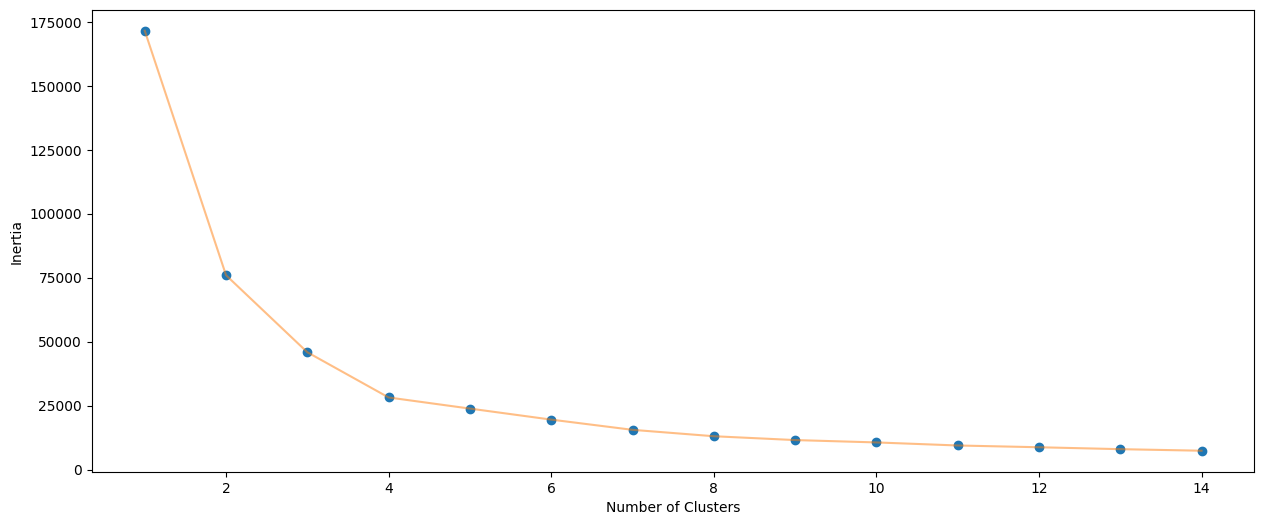

In [12]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. Here’s a more detailed breakdown:

- **Compute Clustering for Different \( K \) Values**: You run a clustering algorithm (like K-Means) for a range of \( K \) cluster values (typically 1 to 10 or more). For each \( K \), the algorithm will partition your data into \( K \) clusters.

- **Calculate Sum of Squared Distances**: For each \( K \), you calculate the total sum of squared distances from each point to its assigned cluster center. This is a measure of how internally coherent the clusters are.

- **Plot the Elbow Curve**: You plot these sums of squared distances in a line graph, with the number of clusters \( K \) on the x-axis and the sum on the y-axis.

- **Identify the Elbow Point**: As \( K \) increases, the sum of squared distances will start to decrease more slowly. Eventually, the rate of decrease sharply changes, and it starts to level off, creating an "elbow" in the graph. The idea is to choose the \( K \) at the elbow as the right number of clusters because it represents the point where adding more clusters doesn’t give much better modeling of the data.

- **Interpretation**: Choosing the elbow is somewhat subjective and not always clear-cut. It's the point where adding another cluster doesn't give much better modeling of the data. Past this point, you’re splitting clusters without much gain in terms of explained variation, and you may start overfitting your model to the noise in the data rather than identifying distinct groups.

The elbow method is widely used because it’s relatively simple and intuitive. However, it's important to note that it’s a heuristic and doesn't work perfectly for all datasets, especially if the data is very uniform or if there are no clear clusters. In such cases, other methods like the silhouette score or the gap statistic might be more appropriate.


#### 2D KMeans with optimal K 

In [13]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [14]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

- `h = 0.02`: This line sets the step size for the meshgrid. The meshgrid is used to create a grid of points over the range of your data so that you can later classify and visualize the decision boundaries.

- `x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1`: This line calculates the minimum and maximum values for the first feature (column 0) in your dataset `X1`. It then adds and subtracts 1 to create a little extra padding around the minimum and maximum values.

- `y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1`: Similarly, this line calculates the minimum and maximum values for the second feature (column 1) in your dataset `X1` and adds/subtracts 1 for padding.

- `xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))`: This line creates a meshgrid of points that covers the range defined by `x_min`, `x_max`, `y_min`, and `y_max` with a step size of `h`. This meshgrid will be used to evaluate the clustering algorithm's predictions at each point on the grid to visualize the decision boundaries.

- `Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])`: In this line, the `algorithm` (presumably a K-means clustering model) is used to predict cluster labels for each point in the meshgrid. `xx.ravel()` and `yy.ravel()` convert the 2D meshgrid points into a 1D array of (x, y) coordinates, which are then used as input to the `predict` method. The result is an array `Z` that contains the predicted cluster labels for each point in the meshgrid.


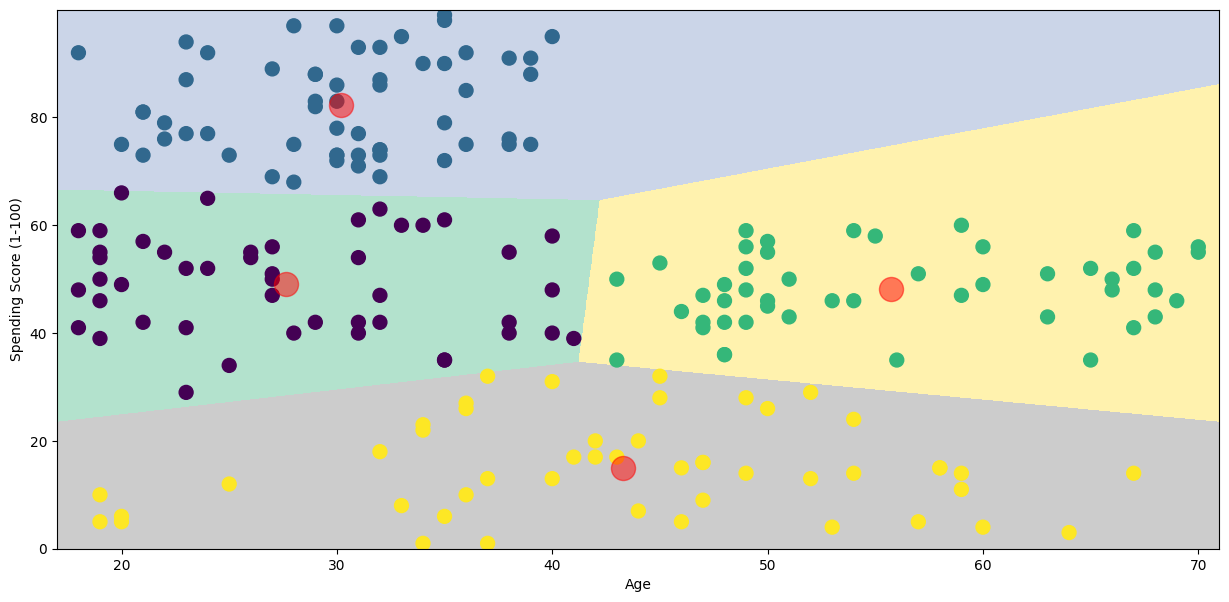

In [15]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

#### Axes:
- **X-axis (Horizontal)**: Represents 'Age', ranging from 0 to 70.
- **Y-axis (Vertical)**: Represents 'Spending Score (1-100)', ranging from 0 to 100.
  The axes suggest that the plot is exploring the relationship between individual ages and their respective spending scores.

#### Data Points:
- The plot contains numerous points, each signifying a data point within the dataset.
- The position of each point is determined by the corresponding 'Age' and 'Spending Score' of the observation.

#### Colors and Clusters:
- Data points are color-coded, indicating segmentation into different groups.
- The colors (blue, purple, green, and yellow) likely represent different categories within the data.

#### Highlighted Points:
- Some data points are emphasized with a larger size and a distinct color (red).
- These may highlight outliers, special cases, or points of interest.


###  3D Clustering Age, Annual Income and Spending Score

In [18]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

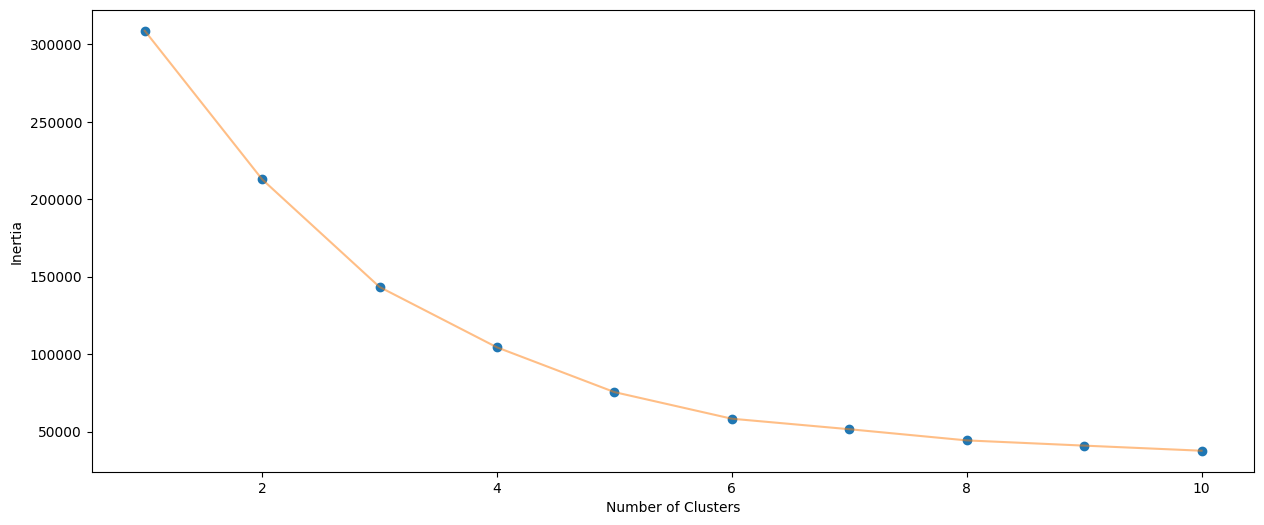

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)

In [21]:
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [23]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters Age, Annual Income & Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### 2D vs. 3D Clustering

### 2D Clustering
- **Overview**: Clusters data points based on two dimensions or features.
- **Visualization**: Can be plotted on a two-dimensional graph, such as a scatter plot.
- **Example**: Clustering based on 'Age' and 'Spending Score' is a typical 2D clustering scenario.

### 3D Clustering
- **Overview**: Extends 2D clustering by adding a third dimension or feature for analysis.
- **Visualization**: Requires three-dimensional space for representation, which may need interactive visualization tools.
- **Complexity**: Offers more insight for complex relationships that are not apparent in 2D.

### Comparison
- **Dimensionality**: 
  - 2D uses two features.
  - 3D uses three, allowing for more complex pattern recognition.
- **Visualization**: 
  - 2D is simpler to create and interpret.
  - 3D is more complex and might need dynamic tools for proper interpretation.
- **Complexity**: 
  - 3D clustering deals with the "curse of dimensionality," leading to more complex computational and interpretive challenges.
- **Use Cases**: 
  - 2D is suitable for simpler datasets or when two features are relevant.
  - 3D is better for more intricate datasets where a third feature provides additional insight.

The choice between 2D and 3D clustering hinges on the analysis requirements, dataset complexity, and the value added by an extra dimension in uncovering significant data patterns.
